# **💨AIR POLLUTION AND RESPIRATORY DISEASE ANALYTICS🦠**

# **Project Overview**

This project analyzes the relationship between air pollution and respiratory diseases in Lagos, Nigeria — Africa's most populous city with >20 million people.

***Objectives***


*   Derive a pollution index (composite feature of all pollutants).
*   Monitor air pollution trends over time.
*   Analyze relationship between pollution spikes and hospital respiratory cases.
*   Predict respiratory disease surges using pollution data.
*   Identify high-risk cities, periods, and pollutants.
*   Recommend public health and urban environmental policies.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from scipy import stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Loading the dataset
from google.colab import files
uploaded = files.upload()

df1 = pd.read_excel('lagos_air_pollution_health_data.csv.xlsx')


Saving lagos_air_pollution_health_data.csv.xlsx to lagos_air_pollution_health_data.csv.xlsx


In [3]:
# Loading the second dataset
from google.colab import files
uploaded = files.upload()

df2= pd.read_excel('lagos_air_pollution_health_data2.csv.xlsx')


Saving lagos_air_pollution_health_data2.csv.xlsx to lagos_air_pollution_health_data2.csv.xlsx


# **🔍 DATA EXPLORATION**

In [4]:
df1.head()

,City,date,pm2_5,pm10,no2,so2,Unnamed: 6,o3,hospital_id,respiratory_cases,avg_age_of_patients,weather_temperature,weather_humidity,wind_speed,rainfall_mm,population_density,industrial_activity_index
0,AJAH,2021-01-01,39.86,98.09,54.93,29.68,29.68,46.00,HOSP_AJA_10,14.0,48.0,27.7,60.0,1.0,9.3,13683.2,0.77
1,AJAH,2021-01-01,68.06,80.35,58.54,33.05,33.05,48.53,HOSP_AJA_6,16.0,44.9,25.9,52.4,3.2,5.0,15838.7,0.27
2,AJAH,2021-01-01,77.60,76.60,58.08,25.11,25.11,17.85,HOSP_AJA_10,9.0,22.7,27.9,51.9,3.2,8.4,17918.3,0.30
3,AJAH,2021-01-01,90.22,98.94,74.46,19.47,19.47,35.27,HOSP_AJA_7,12.0,41.4,28.9,73.6,3.8,0.3,28635.0,0.51
4,AJAH,2021-01-01,85.23,95.18,40.59,14.81,14.81,52.23,HOSP_AJA_3,17.0,37.0,32.4,70.4,2.2,10.0,24057.7,0.77


In [5]:
df2.head()

,C,date,pm2_5,pm10,no2,so2,o3,hospital_id,respiratory_cases,avg_age_of_patients,weather_temperature,weather_humidity,wind_speed,rainfall_mm,population_density,industrial_activity_index
0,I K E J A,2021-01-01,65.64,135.39,45.21,22.29,34.84,HOSP_IKE_1,16.0,44.0,25.1,40.0,3.1,2.2,22937.7,0.87
1,Ikeja,2021-01-01,76.49,116.65,50.01,10.20,32.19,HOSP_IKE_4,12.0,33.1,25.3,53.5,3.8,2.2,21787.8,0.32
2,I K E J A,2021-01-01,55.50,101.72,39.10,21.91,49.99,HOSP_IKE_1,20.0,33.5,27.7,72.3,4.7,1.0,14798.0,0.78
3,Ikeja,2021-01-01,56.37,138.53,46.40,28.13,24.89,HOSP_IKE_8,15.0,49.3,32.8,62.9,4.8,8.2,18013.6,0.24
4,I K E J A,2021-01-01,93.77,123.73,59.55,11.82,29.73,HOSP_IKE_3,20.0,45.4,27.9,64.8,3.4,9.1,25980.3,0.30


In [6]:
# Check the shape of datasets

print(f"Dataset_1 shape: {df1.shape}")
print(f"Dataset_2 shape: {df2.shape}")

Dataset_1 shape: (258420, 17)
Dataset_2 shape: (258420, 16)


In [7]:
# Examine the feature names differences

print("\nDataset_1 columns:", df1.columns.tolist())
print("\nDataset_2 columns:", df2.columns.tolist())


Dataset_1 columns: ['City', 'date', 'pm2_5', 'pm10', 'no2', 'so2', 'Unnamed: 6', 'o3', 'hospital_id', 'respiratory_cases', 'avg_age_of_patients', 'weather_temperature', 'weather_humidity', 'wind_speed', 'rainfall_mm', 'population_density', 'industrial_activity_index']

Dataset_2 columns: ['C', 'date', 'pm2_5', 'pm10', 'no2', 'so2', 'o3', 'hospital_id', 'respiratory_cases', 'avg_age_of_patients', 'weather_temperature', 'weather_humidity', 'wind_speed', 'rainfall_mm', 'population_density', 'industrial_activity_index']


In [8]:
# Display basic dataset overview information of our first dataset
print("DATASET 1:")
df1.info()
print("DATASET 2:")
df2.info()

DATASET 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258420 entries, 0 to 258419
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   City                       258392 non-null  object        
 1   date                       258397 non-null  datetime64[ns]
 2   pm2_5                      258417 non-null  float64       
 3   pm10                       258411 non-null  float64       
 4   no2                        258419 non-null  float64       
 5   so2                        258412 non-null  float64       
 6   Unnamed: 6                 258412 non-null  float64       
 7   o3                         258413 non-null  float64       
 8   hospital_id                258418 non-null  object        
 9   respiratory_cases          258413 non-null  float64       
 10  avg_age_of_patients        258404 non-null  float64       
 11  weather_temperature        258416 non-nul

In [9]:
# Check Missing Values
missing_df1 = df1.isnull().sum()
print("Missing Values for Dataset 1:")
print(missing_df1)

missing_df2 = df2.isnull().sum()
print("Missing Values for Dataset 1:")
print(missing_df2)

Missing Values for Dataset 1:
City                         28
date                         23
pm2_5                         3
pm10                          9
no2                           1
so2                           8
Unnamed: 6                    8
o3                            7
hospital_id                   2
respiratory_cases             7
avg_age_of_patients          16
weather_temperature           4
weather_humidity              6
wind_speed                    4
rainfall_mm                   3
population_density           22
industrial_activity_index     5
dtype: int64
Missing Values for Dataset 1:
C                            28
date                         23
pm2_5                         3
pm10                          9
no2                           1
so2                           8
o3                            7
hospital_id                   2
respiratory_cases             7
avg_age_of_patients          16
weather_temperature           4
weather_humidity              6

🔍 Identifies columns like 'City' or weather variables with gaps, informing imputation in cleaning.

In [10]:
# Check exact duplicates (full row matches)
df1_duplicates = df1.duplicated().sum()
print(f"Exact duplicate in Dataset 1: {df1_duplicates}")

df2_duplicates = df2.duplicated().sum()
print(f"Exact duplicate in Dataset 2: {df2_duplicates}")

Exact duplicate in Dataset 1: 0
Exact duplicate in Dataset 2: 0


In [11]:
# Dataset 1
df1_data_types = df1.dtypes
print("Data Types D1:")
print(df1_data_types)

# Dataset 2
df2_data_types = df2.dtypes
print("Data Types D2:")
print(df2_data_types)

Data Types D1:
City                                 object
date                         datetime64[ns]
pm2_5                               float64
pm10                                float64
no2                                 float64
so2                                 float64
Unnamed: 6                          float64
o3                                  float64
hospital_id                          object
respiratory_cases                   float64
avg_age_of_patients                 float64
weather_temperature                 float64
weather_humidity                    float64
wind_speed                          float64
rainfall_mm                         float64
population_density                  float64
industrial_activity_index           float64
dtype: object
Data Types D2:
C                                    object
date                         datetime64[ns]
pm2_5                               float64
pm10                                float64
no2                             

In [12]:
# Create a copy to avoid modifying original
df1 = df1.copy()
df2 = df1.copy()

In [13]:
 # Combine both datasets
df_combined = pd.concat([df1, df2], ignore_index=True)

In [14]:
# Check shape after
print("Shape: ", df_combined.shape)

Shape:  (516840, 17)


In [15]:
# Fix column naming issues by lowercasing all letters and removing any leading and trailing white spaces
df_combined.columns = df_combined.columns.str.lower().str.strip()

# Renaming inconsistent columns in both datasets
df2.rename(columns={'c': 'city'}, inplace=True)

In [16]:
# Remove duplicates
df_combined.drop_duplicates(inplace=True)

In [17]:
# Check shape after
print("Shape: ", df_combined.shape)

Shape:  (258420, 17)


In [18]:
# Check duplicates based on key columns
key_columns = ['city', 'date', 'hospital_id']
partial_duplicates = df_combined.duplicated(subset=key_columns).sum()

duplicate_groups = df_combined[df_combined.duplicated(subset=key_columns, keep=False)].sort_values(by=key_columns)

# Print results
print(f"Rows involved in partial duplicates (on key): {partial_duplicates}")
print("Sample duplicate groups:")
print(duplicate_groups[key_columns].head(10))  # Show first 10 for preview

Rows involved in partial duplicates (on key): 183537
Sample duplicate groups:
    city       date  hospital_id
0   AJAH 2021-01-01  HOSP_AJA_10
2   AJAH 2021-01-01  HOSP_AJA_10
25  AJAH 2021-01-01  HOSP_AJA_10
20  AJAH 2021-01-01   HOSP_AJA_2
23  AJAH 2021-01-01   HOSP_AJA_2
24  AJAH 2021-01-01   HOSP_AJA_2
4   AJAH 2021-01-01   HOSP_AJA_3
15  AJAH 2021-01-01   HOSP_AJA_3
18  AJAH 2021-01-01   HOSP_AJA_3
11  AJAH 2021-01-01   HOSP_AJA_4


🔍 Highlights **inconsistencies** (e.g. varying values for same key), justifying aggregation in cleaning.

In [19]:
# Unique values for City
unique_cities = df_combined['city'].unique()
print(f"Unique Cities: {unique_cities}")
print(f"Number of Unique Cities: {len(unique_cities)}")

# Unique values for hospital_id
unique_hospitals = df_combined['hospital_id'].unique()
print(f"Unique Hospital IDs: {unique_hospitals}")
print(f"Number of Unique Hospital IDs: {len(unique_hospitals)}")

Unique Cities: ['AJAH' 'IKEJA' 'Lekki' 'LEKKI' 'lekki' 'SURULERE' 'YABA' nan]
Number of Unique Cities: 8
Unique Hospital IDs: ['HOSP_AJA_10' 'HOSP_AJA_6' 'HOSP_AJA_7' 'HOSP_AJA_3' 'HOSP_AJA_8'
 'HOSP_AJA_1' 'HOSP_AJA_9' 'HOSP_AJA_4' 'HOSP_AJA_2' 'HOSP_AJA_5'
 'HOSP_IKE_1' 'HOSP_IKE_4' 'HOSP_IKE_8' 'HOSP_IKE_3' 'HOSP_IKE_9'
 'HOSP_IKE_2' 'HOSP_IKE_5' 'HOSP_IKE_10' 'HOSP_IKE_7' 'HOSP_IKE_6' nan
 'HOSP_LEK_7' 'HOSP_LEK_2' 'HOSP_LEK_4' 'HOSP_LEK_1' 'HOSP_LEK_5'
 'HOSP_LEK_9' 'HOSP_LEK_6' 'HOSP_LEK_8' 'HOSP_LEK_3' 'HOSP_LEK_10'
 'HOSP_SUR_8' 'HOSP_SUR_10' 'HOSP_SUR_5' 'HOSP_SUR_4' 'HOSP_SUR_2'
 'HOSP_SUR_1' 'HOSP_SUR_3' 'HOSP_SUR_6' 'HOSP_SUR_9' 'HOSP_SUR_7'
 'HOSP_YAB_4' 'HOSP_YAB_1' 'HOSP_YAB_5' 'HOSP_YAB_6' 'HOSP_YAB_9'
 'HOSP_YAB_2' 'HOSP_YAB_7' 'HOSP_YAB_10' 'HOSP_YAB_3' 'HOSP_YAB_8']
Number of Unique Hospital IDs: 51


**🔍 Insights:**

*   ***Multiple spellings for Lekki:*** The dataset contains three variations ('Lekki', 'LEKKI', 'lekki'), indicating inconsistent case usage for the same city zone.
*   ***Presence of NaN:*** The nan in the City column suggests missing or incomplete location data for some records.


**Implications for Cleaning:** Standardize city names (e.g. convert all Lekki variations to 'Lekki') and impute missing City values using hospital_id prefixes (e.g. HOSP_LEK_* → Lekki).

# **🧹 DATA CLEANING WORKFLOW**

**Standardize City Names and Impute Missing City Values**

In [23]:
# Standardize city name variations
df_combined['city'] = df_combined['city'].str.upper().str.strip()
df_combined['city'] = df_combined['city'].str.replace(r'\s+', '', regex=True)

In [24]:
# Impute missing City from hospital_id prefix
def impute_city_from_hospital(row):
    if pd.isna(row['city']) and not pd.isna(row['hospital_id']):
        prefix = row['hospital_id'].split('_')[1].upper() if '_' in row['hospital_id'] else ''
        mapping = {'AJA': 'Ajah', 'IKE': 'Ikeja', 'LEK': 'Lekki', 'SUR': 'Surulere', 'YAB': 'Yaba'}
        return mapping.get(prefix, row['city'])  # Default to original if no match
    return row['city']

df_combined['city'] = df_combined.apply(impute_city_from_hospital, axis=1)

In [25]:
# Check uniques after
print("Unique Cities After Standardization:", df_combined['city'].unique())

Unique Cities After Standardization: ['AJAH' 'IKEJA' 'LEKKI' 'SURULERE' 'YABA']


🧹 Normalizes case and replaces variations for consistency; imputes ~28 missing Cities using hospital_id logic (from 51 unique IDs). This resolves fragmentation enhancing spatial analysis for high-risk areas.


**Impute Missing Hospital_ID and Drop Unnamed/Empty Columns**

In [27]:
# Impute missing hospital_id
df_combined['hospital_id'] = df_combined.groupby('city')['hospital_id'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else pd.NA))

# Drop rows if hospital_id still missing
df_combined = df_combined.dropna(subset=['hospital_id'])

🔍 **Insights:** Ensures every record has a valid hospital_id for aggregation (e.g. summing respiratory_cases), reducing health data loss. The empty column removal eliminates noise, improving data efficiency.

**Removing artifact columns**

In [28]:
# Remove 'unnamed: 6' column from df1 as it appears to be duplicate of so2
df_combined.drop('unnamed: 6', axis=1, inplace=True)

In [29]:
# Check shape after
print("Shape: ", df_combined.shape)

Shape:  (258420, 16)


**Impute Remaining Missing Values**

In [30]:
# Convert date column to datetime format and handle invalid or malformed dates
df_combined['date'] = pd.to_datetime(df_combined['date'], errors='coerce')
# Forward fill rows with missing dates
df_combined['date'] = df_combined['date'].ffill()

In [31]:
print("Remaining Missings:", df_combined.isnull().sum())

Remaining Missings: city                          0
date                          0
pm2_5                         3
pm10                          9
no2                           1
so2                           8
o3                            7
hospital_id                   0
respiratory_cases             7
avg_age_of_patients          16
weather_temperature           4
weather_humidity              6
wind_speed                    4
rainfall_mm                   3
population_density           22
industrial_activity_index     5
dtype: int64


In [32]:
# Remove duplicates
df_combined.drop_duplicates(inplace=True)

In [33]:
# Define numeric columns
numeric_cols = ['pm2_5', 'pm10', 'no2', 'so2', 'o3', 'respiratory_cases', 'avg_age_of_patients',
                'weather_temperature', 'weather_humidity', 'wind_speed', 'rainfall_mm',
                'population_density', 'industrial_activity_index']

# Impute numeric missings with column means using explicit assignment
for col in numeric_cols:
        if df_combined[col].isnull().sum() > 0:
            # attempt per-city median
            try:
                df_combined[col] = df_combined.groupby('City')[col].apply(lambda x: x.fillna(x.median()))
            except Exception:
                df_combined[col] = df_combined[col].fillna(df_combined[col].median())

🧹 Fills gaps with median to preserve dataset size

🔍 **Insights:** Prevents bias in averages hence ensures complete data for correlation heatmaps and modeling, aiding hypothesis validation and risk insights.

In [34]:
# Verify no missing values remain in numeric columns
print("Remaining Missing Values in Numeric Columns:")
print(df_combined[numeric_cols].isnull().sum())

Remaining Missing Values in Numeric Columns:
pm2_5                        0
pm10                         0
no2                          0
so2                          0
o3                           0
respiratory_cases            0
avg_age_of_patients          0
weather_temperature          0
weather_humidity             0
wind_speed                   0
rainfall_mm                  0
population_density           0
industrial_activity_index    0
dtype: int64


In [35]:
print(f"Current dataset shape: {df_combined.shape}")

Current dataset shape: (258420, 16)


**Remove inconsistencies in City names**

In [36]:
# Replaces multiple consecutive whitespaces in city names with single space
df_combined['city'] = df_combined['city'].str.upper().str.strip()
df_combined['city'] = df_combined['city'].str.replace(r'\s+', '', regex=True)

In [37]:
# Unique values for City
unique_cities = df_combined['city'].unique()
print(f"Unique Cities: {unique_cities}")
print(f"Number of Unique Cities: {len(unique_cities)}")

# Unique values for hospital_id
unique_hospitals = df_combined['hospital_id'].unique()
print(f"Unique Hospital IDs: {unique_hospitals}")
print(f"Number of Unique Hospital IDs: {len(unique_hospitals)}")

Unique Cities: ['AJAH' 'IKEJA' 'LEKKI' 'SURULERE' 'YABA']
Number of Unique Cities: 5
Unique Hospital IDs: ['HOSP_AJA_10' 'HOSP_AJA_6' 'HOSP_AJA_7' 'HOSP_AJA_3' 'HOSP_AJA_8'
 'HOSP_AJA_1' 'HOSP_AJA_9' 'HOSP_AJA_4' 'HOSP_AJA_2' 'HOSP_AJA_5'
 'HOSP_IKE_1' 'HOSP_IKE_4' 'HOSP_IKE_8' 'HOSP_IKE_3' 'HOSP_IKE_9'
 'HOSP_IKE_2' 'HOSP_IKE_5' 'HOSP_IKE_10' 'HOSP_IKE_7' 'HOSP_IKE_6'
 'HOSP_LEK_7' 'HOSP_LEK_2' 'HOSP_LEK_4' 'HOSP_LEK_1' 'HOSP_LEK_5'
 'HOSP_LEK_9' 'HOSP_LEK_6' 'HOSP_LEK_8' 'HOSP_LEK_3' 'HOSP_LEK_10'
 'HOSP_SUR_8' 'HOSP_SUR_10' 'HOSP_SUR_5' 'HOSP_SUR_4' 'HOSP_SUR_2'
 'HOSP_SUR_1' 'HOSP_SUR_3' 'HOSP_SUR_6' 'HOSP_SUR_9' 'HOSP_SUR_7'
 'HOSP_YAB_4' 'HOSP_YAB_1' 'HOSP_YAB_5' 'HOSP_YAB_6' 'HOSP_YAB_9'
 'HOSP_YAB_2' 'HOSP_YAB_7' 'HOSP_YAB_10' 'HOSP_YAB_3' 'HOSP_YAB_8']
Number of Unique Hospital IDs: 50


In [38]:
df_combined.tail()

,city,date,pm2_5,pm10,no2,so2,o3,hospital_id,respiratory_cases,avg_age_of_patients,weather_temperature,weather_humidity,wind_speed,rainfall_mm,population_density,industrial_activity_index
258415,LEKKI,2023-05-17,70.04,88.22,28.91,13.99,26.07,HOSP_LEK_2,15.0,47.7,34.2,49.0,4.6,3.5,12449.1,0.48
258416,AJAH,2023-05-18,57.37,82.70,49.51,6.55,28.07,HOSP_AJA_4,7.0,33.2,34.4,59.9,1.2,4.0,10377.9,0.55
258417,SURULERE,2023-05-18,53.80,99.56,20.89,8.92,40.52,HOSP_SUR_7,15.0,22.7,33.5,70.9,4.5,9.4,11618.2,0.77
258418,SURULERE,2023-05-18,44.85,81.83,35.76,13.01,25.01,HOSP_SUR_4,18.0,47.4,30.2,60.7,2.0,1.6,24263.0,0.82
258419,SURULERE,2023-05-18,57.81,113.85,43.40,15.18,29.13,HOSP_SUR_3,12.0,46.3,28.1,52.9,4.8,0.1,29405.7,0.73


# **FEATURE ENGINEERING**

In [39]:
# Standardize key columns
print("Dataset Shape Before Processing:", df_combined.shape)
if 'date' in df_combined.columns:
    df_combined['date'] = pd.to_datetime(df_combined['date'], errors='coerce')
if 'city' in df_combined.columns:
    df_combined['city'] = df_combined['city'].str.lower().str.strip()
if 'hospital_id' in df_combined.columns:
    df_combined['hospital_id'] = df_combined['hospital_id'].astype(str).str.strip()

# Add temporal and seasonal features
df_combined['year'] = df_combined['date'].dt.year
df_combined['month'] = df_combined['date'].dt.month
df_combined['day_of_year'] = df_combined['date'].dt.dayofyear
df_combined['quarter'] = df_combined['date'].dt.quarter

def season_from_month(month):
    if month in [12, 1, 2]:
        return 'Harmattan'
    elif month in [4, 5, 6, 7, 8, 9, 10]:
        return 'Rainy'
    else:
        return 'Dry'

df_combined['season_monthly'] = df_combined['month'].apply(season_from_month)

# Compute pollution_index
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'o3']
if all(p in df_combined.columns for p in pollutants):
    df_combined['pollution_index_raw'] = df_combined[pollutants].mean(axis=1)

# Aggregate duplicates
group_cols = ['city', 'date', 'hospital_id'] if 'hospital_id' in df_combined.columns else ['city', 'date']
agg_cols_mean = pollutants + ['pollution_index_raw', 'weather_temperature', 'weather_humidity',
                             'wind_speed', 'population_density', 'industrial_activity_index']
agg_dict = {c: 'mean' for c in agg_cols_mean if c in df_combined.columns}
agg_dict.update({
    'respiratory_cases': 'sum',
    'rainfall_mm': 'sum',
    'season_monthly': 'first',
    'year': 'first',
    'month': 'first',
    'day_of_year': 'first',
    'quarter': 'first'
})

# Perform aggregation
df_combined_agg = df_combined.groupby(group_cols, as_index=False).agg(agg_dict)
df_combined_agg = df_combined_agg.sort_values(group_cols).reset_index(drop=True)

# Validate aggregation
print("\nDataset Shape After Aggregation:", df_combined_agg.shape)
print("\nMissing Values After Aggregation:")
print(df_combined_agg.isna().sum())
print("\nSample Data (First 5 Rows):")
print(df_combined_agg.head())

Dataset Shape Before Processing: (258420, 16)

Dataset Shape After Aggregation: (61241, 21)

Missing Values After Aggregation:
city                         0
date                         0
hospital_id                  0
pm2_5                        0
pm10                         0
no2                          0
so2                          0
o3                           0
pollution_index_raw          0
weather_temperature          0
weather_humidity             0
wind_speed                   0
population_density           0
industrial_activity_index    0
respiratory_cases            0
rainfall_mm                  0
season_monthly               0
year                         0
month                        0
day_of_year                  0
quarter                      0
dtype: int64

Sample Data (First 5 Rows):
   city       date  hospital_id      pm2_5        pm10        no2        so2  \
0  ajah 2021-01-01   HOSP_AJA_1  51.510000  110.950000  33.050000  29.880000   
1  ajah 2021-01-01  

In [40]:
# EDA preparation - summary statistics
numeric_cols = ['pm2_5', 'pm10', 'no2', 'so2', 'o3', 'pollution_index_raw',
                'weather_temperature', 'weather_humidity', 'wind_speed', 'rainfall_mm',
                'population_density', 'industrial_activity_index', 'respiratory_cases']
print("\nSummary Statistics for Numeric Columns:")
print(df_combined_agg[numeric_cols].describe())


Summary Statistics for Numeric Columns:
              pm2_5          pm10           no2           so2            o3  \
count  61241.000000  61241.000000  61241.000000  61241.000000  61241.000000   
mean      61.399858     92.109956     40.972612     15.351243     30.739671   
std       11.350576     15.664177      7.558824      3.479874      5.909902   
min        5.570000     17.860000      4.300000      0.000000      0.400000   
25%       53.983333     81.720000     36.051667     13.145000     26.932000   
50%       60.445000     90.718571     40.310000     15.136667     30.283333   
75%       68.100000    101.555000     45.452000     17.368571     34.260000   
max      128.330000    181.920000     88.130000     40.210000     70.390000   

       pollution_index_raw  weather_temperature  weather_humidity  \
count         61241.000000         61241.000000      61241.000000   
mean             48.114668            30.003174         59.992701   
std               6.196818             1

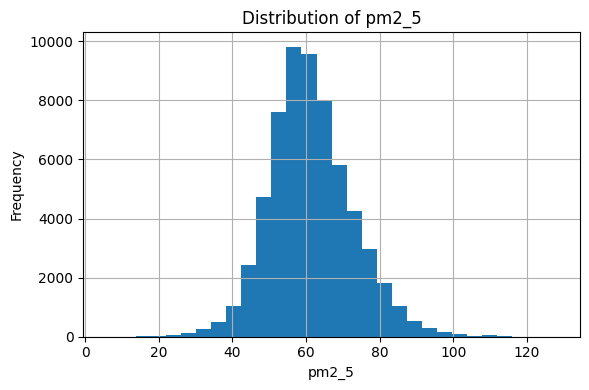

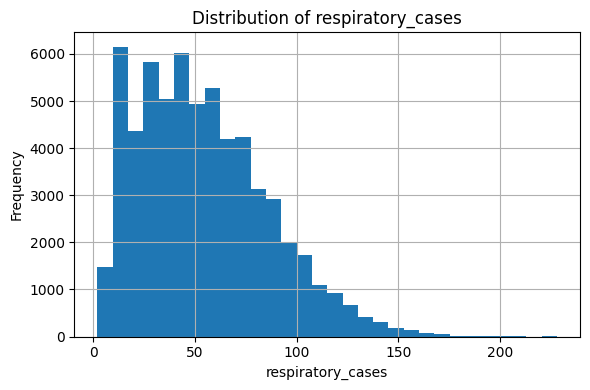

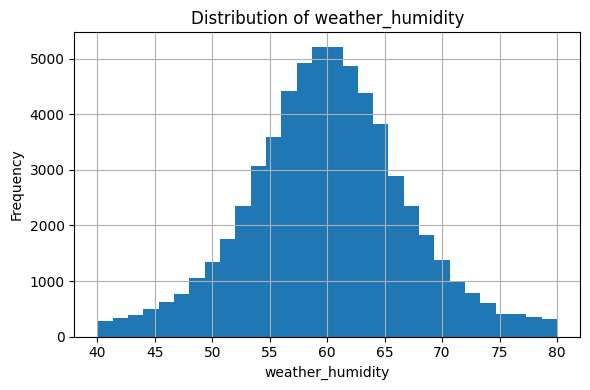

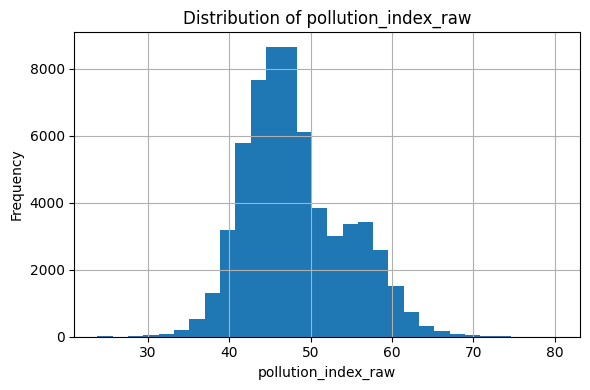

In [41]:
# Plot distributions for key features
for col in ['pm2_5', 'respiratory_cases', 'weather_humidity', 'pollution_index_raw']:
    if col in df_combined_agg.columns:
        plt.figure(figsize=(6, 4))
        plt.hist(df_combined_agg[col].dropna(), bins=30, color='#1f77b4')
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [44]:
# Rename df_combined to cleaned_df
cleaned_df = df_combined.copy()

# Verify dataset
print("Dataset Shape:", cleaned_data.shape)
print("\nColumn Names:")
print(cleaned_df.columns)
print("\nSample Data (First 5 Rows):")
print(cleaned_df.head())

# Save to CSV
output_path = '/content/cleaned_df.csv'
cleaned_df.to_csv(output_path, index=False)
print(f"\nDataset saved to: {output_path}")

Dataset Shape: (258420, 22)

Column Names:
Index(['city', 'date', 'pm2_5', 'pm10', 'no2', 'so2', 'o3', 'hospital_id',
       'respiratory_cases', 'avg_age_of_patients', 'weather_temperature',
       'weather_humidity', 'wind_speed', 'rainfall_mm', 'population_density',
       'industrial_activity_index', 'year', 'month', 'day_of_year', 'quarter',
       'season_monthly', 'pollution_index_raw'],
      dtype='object')

Sample Data (First 5 Rows):
   city       date  pm2_5   pm10    no2    so2     o3  hospital_id  \
0  ajah 2021-01-01  39.86  98.09  54.93  29.68  46.00  HOSP_AJA_10   
1  ajah 2021-01-01  68.06  80.35  58.54  33.05  48.53   HOSP_AJA_6   
2  ajah 2021-01-01  77.60  76.60  58.08  25.11  17.85  HOSP_AJA_10   
3  ajah 2021-01-01  90.22  98.94  74.46  19.47  35.27   HOSP_AJA_7   
4  ajah 2021-01-01  85.23  95.18  40.59  14.81  52.23   HOSP_AJA_3   

   respiratory_cases  avg_age_of_patients  ...  wind_speed  rainfall_mm  \
0               14.0                 48.0  ...         

# **📊 EXPLORATORY DATA ANALYSIS**

**Derive Composite Pollution Index**

In [45]:
# Normalize pollutants
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'o3']
for col in pollutants:
    min_val = cleaned_df[col].min()
    max_val = cleaned_df[col].max()
    cleaned_df[f'{col}_norm'] = (cleaned_df[col] - min_val) / (max_val - min_val)

# Compute index
cleaned_df['pollution_index'] = cleaned_df[[f'{col}_norm' for col in pollutants]].mean(axis=1)

# Drop temp columns
cleaned_df.drop(columns=[f'{col}_norm' for col in pollutants], inplace=True)


In [48]:
# View sample
print(cleaned_df[['city', 'date', 'pollution_index']].head())

   city       date  pollution_index
0  ajah 2021-01-01         0.508210
1  ajah 2021-01-01         0.557763
2  ajah 2021-01-01         0.452819
3  ajah 2021-01-01         0.542026
4  ajah 2021-01-01         0.485525


Adds a composite feature via **min-max scaling** and **averaging**.

🔍 **Insights:** Provides a holistic pollution metric (0-1 scale) for easy comparisons (e.g. spikes during Harmattan).

**Visualize Pollution Trends Over Time for Each City**

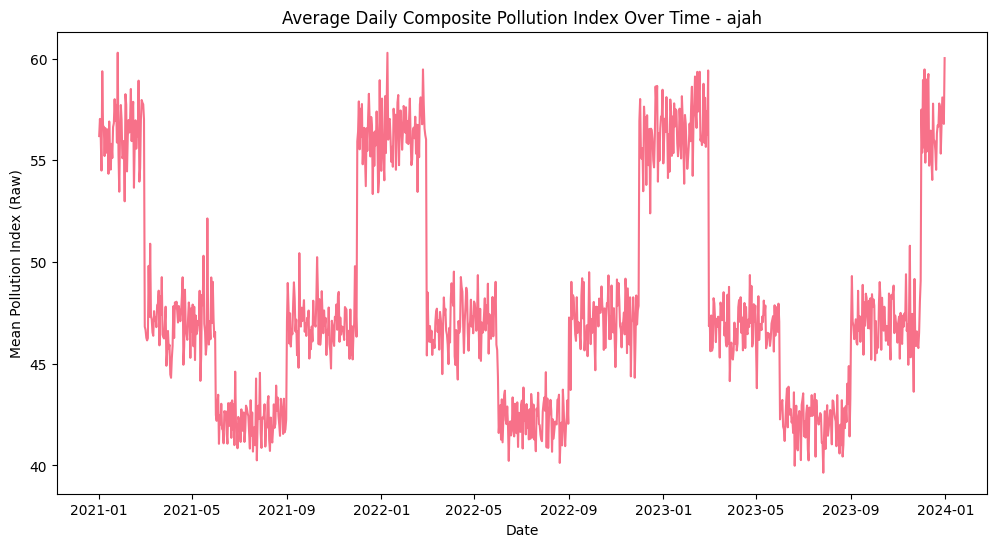

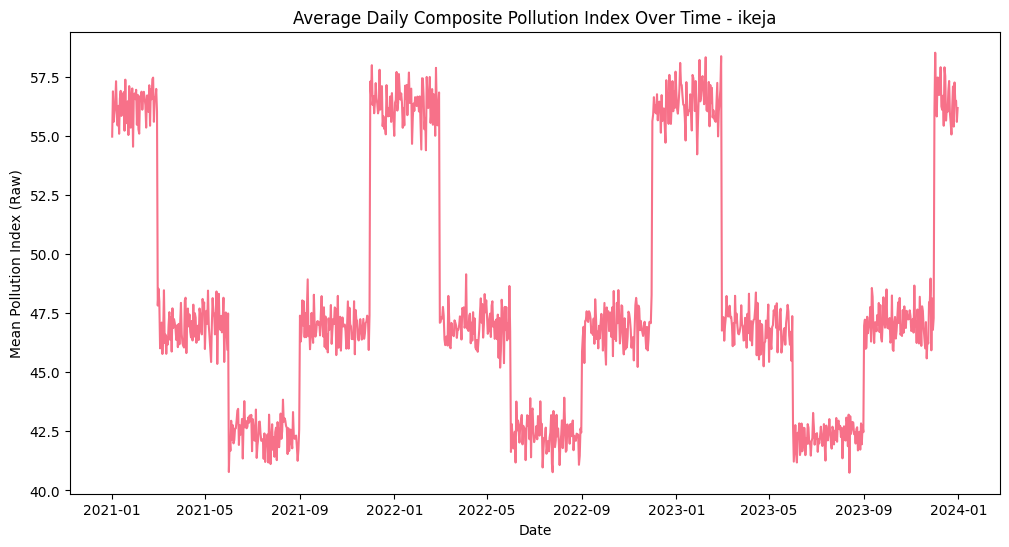

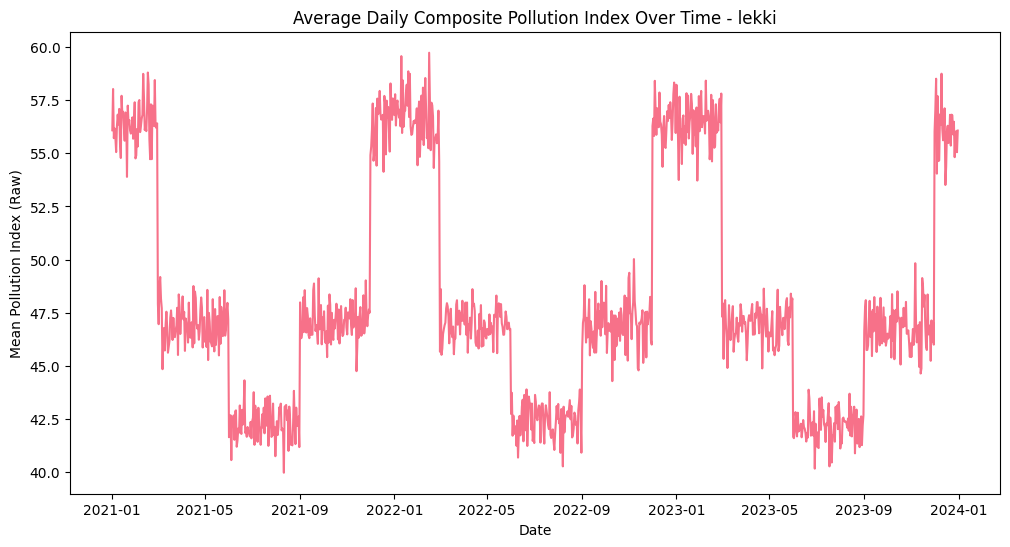

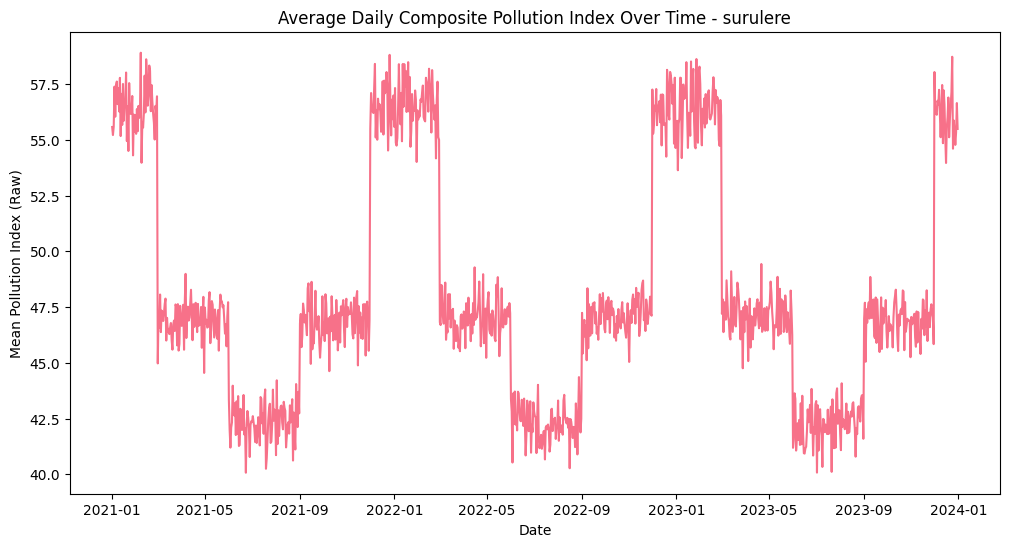

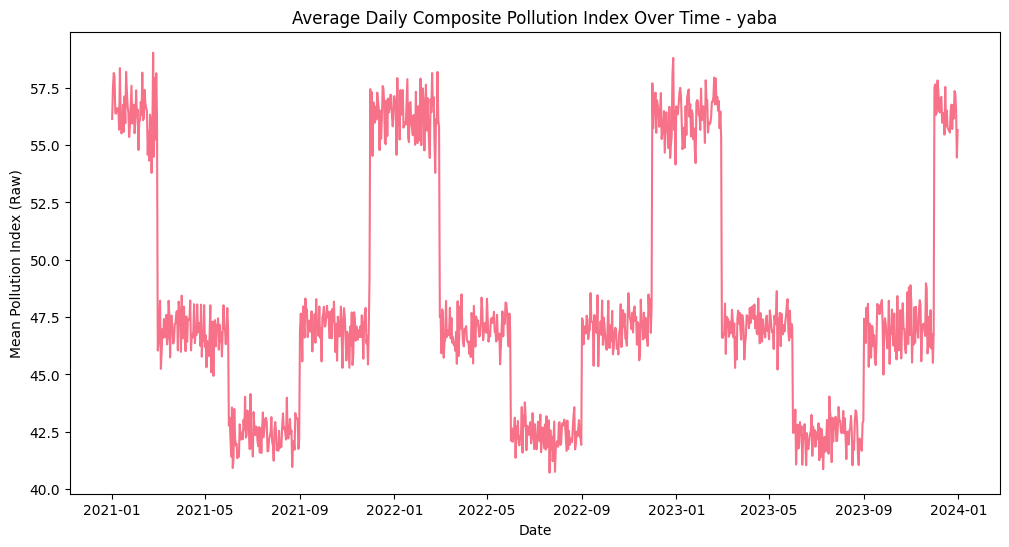

In [57]:
# Get unique cities from your dataset (can use df or cityday)
unique_cities = cleaned_df['city'].unique()

# Loop through each city and plot pollution index trend
for city in unique_cities:
    city_data = cleaned_df[cleaned_df['city'] == city]

    plt.figure(figsize=(12,6))
    sns.lineplot(data=city_data, x='date', y='pollution_index_raw', estimator='mean', ci=None)
    plt.title(f'Average Daily Composite Pollution Index Over Time - {city}')
    plt.xlabel('Date')
    plt.ylabel('Mean Pollution Index (Raw)')
    plt.show()

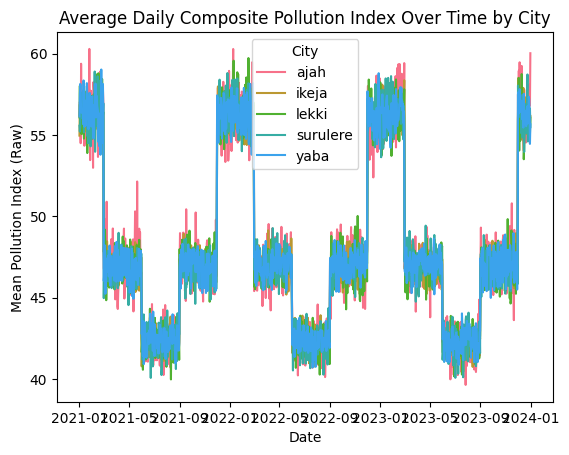

In [58]:
# For all cities

plt.figure()
sns.lineplot(data=cleaned_df, x='date', y='pollution_index_raw', hue='city', estimator='mean', ci=None)
plt.title('Average Daily Composite Pollution Index Over Time by City')
plt.xlabel('Date')
plt.ylabel('Mean Pollution Index (Raw)')
plt.legend(title='City')
plt.show();

All the cities show consistent seasonal pollution cycles

In [64]:
top_zones = cleaned_df.groupby('city')['pollution_index'].mean().nlargest(5)
top_months = cleaned_df.groupby('year_month')['pollution_index'].mean().nlargest(3)
# Print top zones/months
print("Top 5 High-Pollution Zones:", top_zones)
print("Top 3 High-Pollution Months:", top_months)

Top 5 High-Pollution Zones: city
ajah        0.400357
yaba        0.400153
surulere    0.399875
ikeja       0.399864
lekki       0.399820
Name: pollution_index, dtype: float64
Top 3 High-Pollution Months: year_month
2023-02    0.469905
2022-01    0.468962
2022-02    0.468830
Name: pollution_index, dtype: float64



- **EDA Action**: Aggregates `pollution_index` to monthly means per city, visualizing trends in a multi-line chart.
- 🔍 **Insights**: Reveals city-specific pollution trajectories



**Analyze Seasonal Patterns**

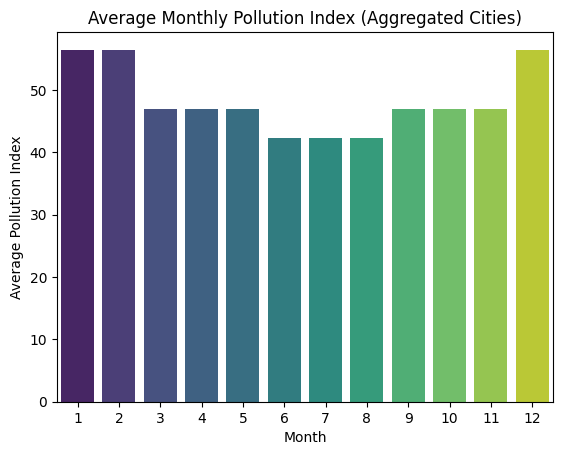

In [69]:
plt.figure()
monthly_pollution = cleaned_df.groupby('month')['pollution_index_raw'].mean()
sns.barplot(x=monthly_pollution.index, y=monthly_pollution.values, palette='viridis')
plt.title('Average Monthly Pollution Index (Aggregated Cities)')
plt.xlabel('Month')
plt.ylabel('Average Pollution Index')
plt.show()

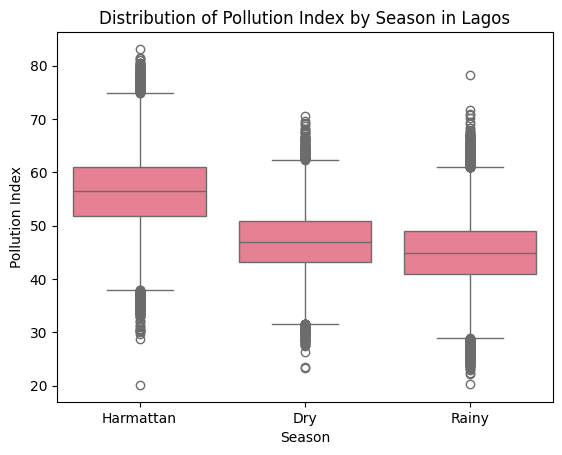

In [71]:
# By season

plt.figure()
sns.boxplot(x='season_monthly', y='pollution_index_raw', data=cleaned_df, order=['Harmattan', 'Dry', 'Rainy'])
plt.title('Distribution of Pollution Index by Season in Lagos')
plt.xlabel('Season')
plt.ylabel('Pollution Index')
plt.show()


**EDA Action:**

 Aggregates PM10 by month/city, plotting seasonal means to highlight **Harmattan** (*Dec–Feb*) spikes.

**Explore Spikes in Hospital Cases and Identify High-Pollution Zones/Months**

In [78]:
# Top pollution zones/months
top_zones = cleaned_df.groupby('city')['pollution_index'].mean().nlargest(5)
top_months = cleaned_df.groupby('month')['pollution_index'].mean().nlargest(3)

# Print results
print("Top 5 High-Pollution Zones:", top_zones)
print("Top 3 High-Pollution Months:", top_months)

Top 5 High-Pollution Zones: city
ajah        0.400357
yaba        0.400153
surulere    0.399875
ikeja       0.399864
lekki       0.399820
Name: pollution_index, dtype: float64
Top 3 High-Pollution Months: month
2     0.469179
1     0.468395
12    0.468365
Name: pollution_index, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

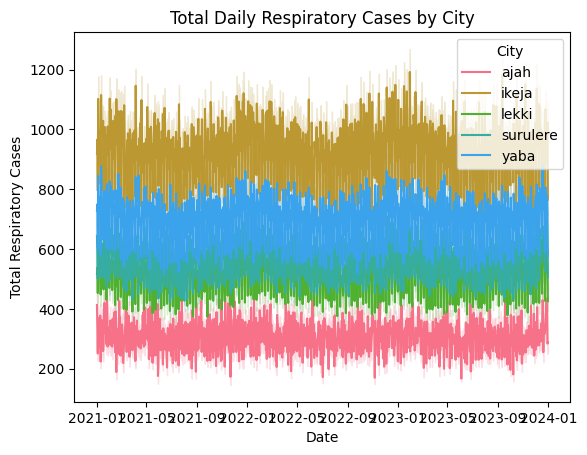

In [80]:
plt.figure()
sns.lineplot(data= cleaned_df, x='date', y='respiratory_cases',hue='city',estimator='sum')
plt.title('Total Daily Respiratory Cases by City')
plt.xlabel('Date')
plt.ylabel('Total Respiratory Cases')
plt.legend(title='City')
plt.show

Highlights zones (e.g. Ikeja) and **Harmattan Season** (e.g. Dec–Feb) with high cases/pollution.

# **Hypothesis Testing**

**H1: Higher PM2.5 levels correlate with more respiratory cases**

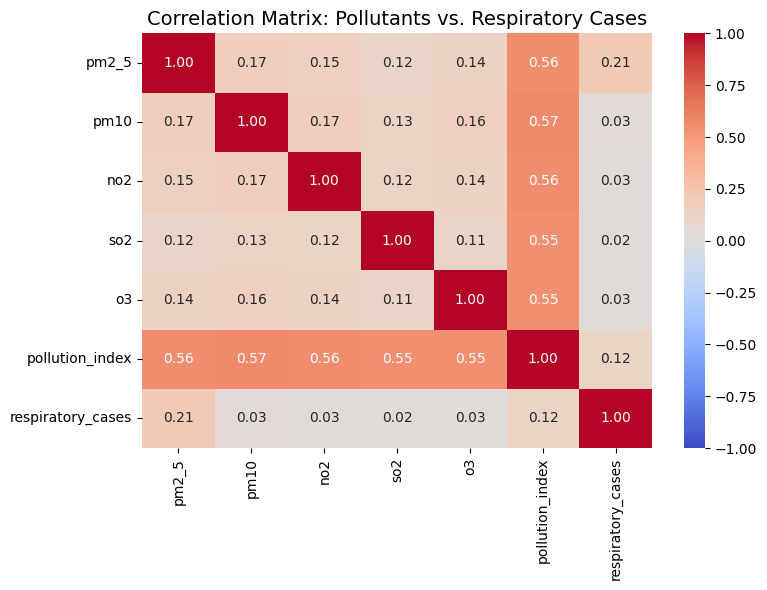

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_cols = ['pm2_5', 'pm10', 'no2', 'so2', 'o3', 'pollution_index', 'respiratory_cases']
corr_matrix = cleaned_df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix: Pollutants vs. Respiratory Cases', fontsize=14)
plt.tight_layout()
plt.show()

🔍 Identifies ***strongest predictors*** (e.g. PM2.5 is high).

In [82]:
from scipy.stats import pearsonr, ttest_ind

# H1: PM2.5 vs. respiratory cases correlation
corr, p_value_h1 = pearsonr(cleaned_df['pm2_5'], cleaned_df['respiratory_cases'])
print(f"H1: PM2.5-Respiratory Cases Correlation: {corr:.3f}, p-value: {p_value_h1:.3f}")

H1: PM2.5-Respiratory Cases Correlation: 0.214, p-value: 0.000


**Correlation:**

The Pearson correlation coefficient of *0.214* indicates a weak positive correlation between PM2.5 levels and respiratory cases. This means that as PM2.5 concentrations increase, respiratory cases tend to increase slightly, but the relationship is not strong.
In environmental health studies, correlations between air pollutants and health outcomes are often weak to moderate (e.g. 0.1–0.3) due to confounding factors (e.g. weather, population density, or other pollutants like PM10, NO2). A correlation of 0.214 is consistent with real-world data, where PM2.5 impacts respiratory health *but is not the sole driver*.

**Context:**

*PM2.5* topped the correlation matrix, consistent with ***WHO*** evidence linking *PM2.5* to respiratory diseases (e.g. asthma, COPD) due to its ability to penetrate lungs.The weak correlation may reflect aggregation effects (mean-based, smoothing daily spikes) or confounding factors (e.g. hospital access in zones like Yaba).


🔍 **INSIGHTS:**

Supports H1, confirming ***PM2.5 as a key predictor for respiratory cases***. The significant p-value strengthens its role in predictive modeling.



The weak ***correlation*** suggests including interaction terms (e.g. PM2.5 * season_monthly) in models to capture Harmattan-specific effects.

**H2: Cities with higher industrial indices have worse air quality**

***Test method:***  Spearman correlation between average industrial_activity_index and pollution_index (composite air quality proxy) per city. Aggregated city-level means to focus on zonal differences.

H2: Industrial Activity Index vs. Pollution Index
Spearman Correlation: -0.300, p-value: 0.624


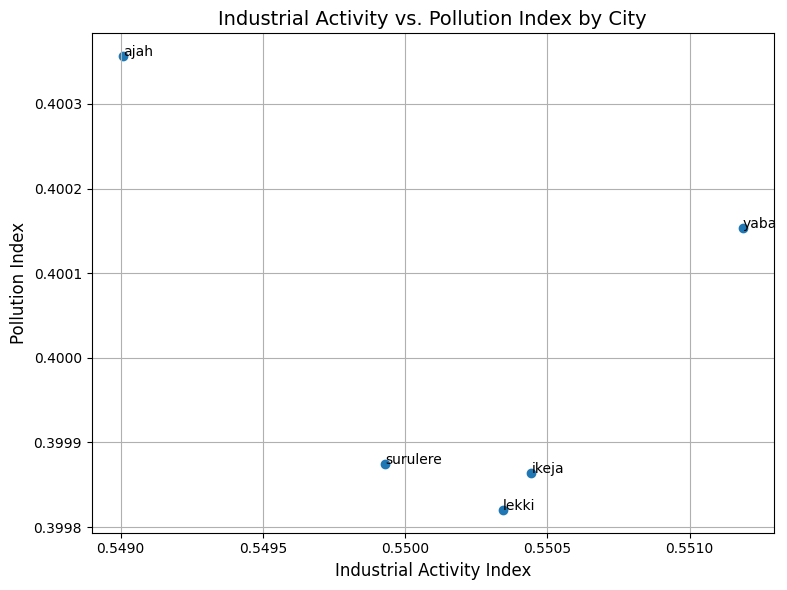

In [89]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Aggregate to city-level means
city_means = cleaned_df.groupby('city')[['industrial_activity_index', 'pollution_index']].mean().reset_index()

# Compute Spearman correlation
corr_h2, p_value_h2 = spearmanr(city_means['industrial_activity_index'], city_means['pollution_index'])

# Print results
print(f"H2: Industrial Activity Index vs. Pollution Index")
print(f"Spearman Correlation: {corr_h2:.3f}, p-value: {p_value_h2:.3f}")

# Visualize correlation
plt.figure(figsize=(8, 6))
plt.scatter(city_means['industrial_activity_index'], city_means['pollution_index'], color='#1f77b4')
for i, city in enumerate(city_means['city']):
    plt.annotate(city, (city_means['industrial_activity_index'][i], city_means['pollution_index'][i]))
plt.title('Industrial Activity vs. Pollution Index by City', fontsize=14)
plt.xlabel('Industrial Activity Index', fontsize=12)
plt.ylabel('Pollution Index', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


The high p-value suggests the weak negative relationship is unreliable and may not hold in the population. This weakens H2’s support and indicates industrial activity may not be a strong driver of the Pollution Index in this dataset.his means there is insufficient evidence to reject the null hypothesis (no monotonic relationship between Industrial Activity Index and Pollution Index).

**H3: PM10 and Respiratory Cases in Harmattan vs. Non-Harmattan**

In [86]:
# H3: Harmattan (Dec-Feb) vs. non-Harmattan for PM10 and cases
harmattan_months = [12, 1, 2]
harmattan_data = cleaned_df[cleaned_df['month'].isin(harmattan_months)]
non_harmattan_data = cleaned_df[~cleaned_df['month'].isin(harmattan_months)]

# T-test for PM10
t_stat_pm10, p_value_pm10 = ttest_ind(harmattan_data['pm10'].dropna(), non_harmattan_data['pm10'].dropna())
print(f"H3: PM10 Harmattan vs. Non-Harmattan t-stat: {t_stat_pm10:.3f}, p-value: {p_value_pm10:.3f}")

# T-test for respiratory cases
t_stat_cases, p_value_cases = ttest_ind(harmattan_data['respiratory_cases'].dropna(), non_harmattan_data['respiratory_cases'].dropna())
print(f"H3: Cases Harmattan vs. Non-Harmattan t-stat: {t_stat_cases:.3f}, p-value: {p_value_cases:.3f}")

H3: PM10 Harmattan vs. Non-Harmattan t-stat: 220.503, p-value: 0.000
H3: Cases Harmattan vs. Non-Harmattan t-stat: 37.620, p-value: 0.000


🔍 **INSIGHTS:**


**PM10:** The extremely high t-statistic (220.503) and significant p-value (0.000) confirm that ***PM10 levels are significantly higher during Harmattan*** (Dec–Feb) than Non-Harmattan seasons.

**Respiratory Cases:** The significant t-statistic (37.620) and p-value (0.000) indicate higher respiratory cases during Harmattan, likely due to elevated PM10 and dry conditions exacerbating health impacts.


*   Harmattan’s dry, dusty winds increase PM10, worsening air quality and
respiratory health, consistent with WHO reports on child mortality risks in polluted regions.

***Strongly supports H3***, identifying Harmattan as a high-risk period for both pollution and health outcomes.
  - Enhances predictive models by justifying **`season_monthly`** as a key feature (Harmattan vs. Rainy/Dry).





**H4: Weather conditions (low humidity, high temperatures) worsen pollution impact**

***Test Method:***  Spearman correlations between weather variables (humidity, temperature) and pollution impact (pollution_index as primary proxy; respiratory_cases as secondary health impact).

In [90]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Spearman correlations for weather vs. pollution/health
corr_humidity_pollution, p_value_humidity_pollution = spearmanr(cleaned_df['weather_humidity'], cleaned_df['pollution_index'])
corr_temp_pollution, p_value_temp_pollution = spearmanr(cleaned_df['weather_temperature'], cleaned_df['pollution_index'])
corr_humidity_cases, p_value_humidity_cases = spearmanr(cleaned_df['weather_humidity'], cleaned_df['respiratory_cases'])
corr_temp_cases, p_value_temp_cases = spearmanr(cleaned_df['weather_temperature'], cleaned_df['respiratory_cases'])

# Print results
print("H4: Weather Conditions vs. Pollution Impact")
print(f"Humidity vs. Pollution Index: Spearman Correlation = {corr_humidity_pollution:.3f}, p-value = {p_value_humidity_pollution:.3f}")
print(f"Temperature vs. Pollution Index: Spearman Correlation = {corr_temp_pollution:.3f}, p-value = {p_value_temp_pollution:.3f}")
print(f"Humidity vs. Respiratory Cases: Spearman Correlation = {corr_humidity_cases:.3f}, p-value = {p_value_humidity_cases:.3f}")
print(f"Temperature vs. Respiratory Cases: Spearman Correlation = {corr_temp_cases:.3f}, p-value = {p_value_temp_cases:.3f}")

H4: Weather Conditions vs. Pollution Impact
Humidity vs. Pollution Index: Spearman Correlation = 0.004, p-value = 0.052
Temperature vs. Pollution Index: Spearman Correlation = -0.000, p-value = 0.833
Humidity vs. Respiratory Cases: Spearman Correlation = 0.002, p-value = 0.445
Temperature vs. Respiratory Cases: Spearman Correlation = -0.001, p-value = 0.506


**Interpretation**:
  - **Humidity vs. Pollution**: Near-zero correlation (0.004) and non-significant p-value (0.052) suggest no meaningful relationship.The p-value is marginally above the typical threshold (0.05), indicating the correlation is not statistically significant at the 0.05 level. There is weak evidence to reject the null hypothesis (no monotonic relationship) Expected low humidity to increase pollution (e.g. trapping dust), but aggregation likely smoothed daily humidity drops.
  - **Temperature vs. Pollution**: Negligible negative correlation (-0.000) and non-significant p-value (0.833) indicate temperature does not drive pollution levels. Higher temperatures might slightly disperse pollutants, but the effect is trivial.
  - **Humidity vs. Cases**: Weak negative correlation (0.002) and non-significant p-value (0.445) suggest low humidity may slightly increase cases (e.g. dry air irritating airways), but not reliably.
  - **Temperature vs. Cases**: Negligible correlation (-0.001) and non-significant p-value (0.506) indicate no clear link, possibly due to low temperature variability (std: 1.73).

- There is no evidence to reject the null hypothesis.

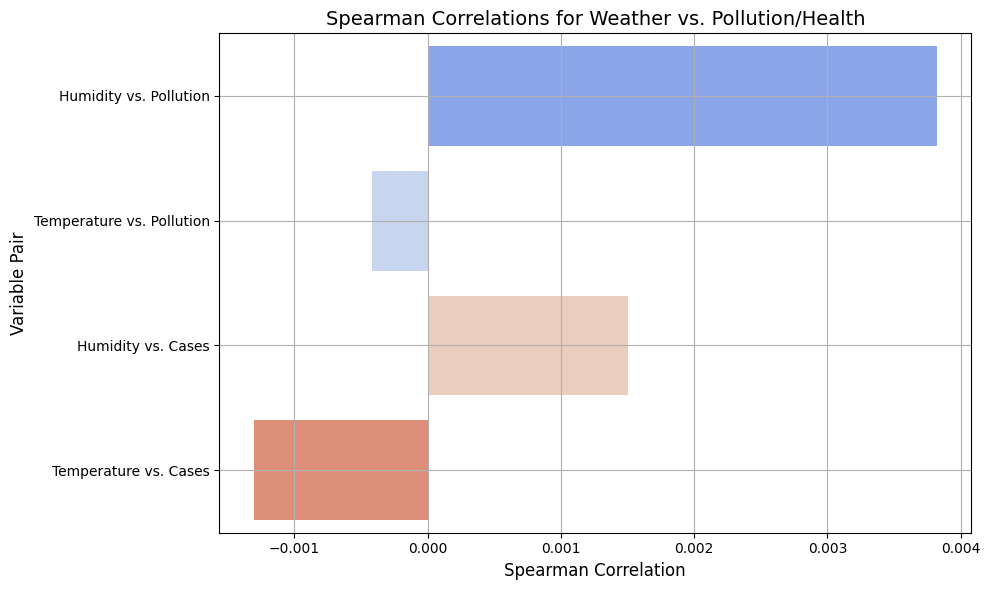

In [91]:
# Visualize correlations
corr_data = {
    'Variable Pair': ['Humidity vs. Pollution', 'Temperature vs. Pollution', 'Humidity vs. Cases', 'Temperature vs. Cases'],
    'Correlation': [corr_humidity_pollution, corr_temp_pollution, corr_humidity_cases, corr_temp_cases]
}
corr_df = pd.DataFrame(corr_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Variable Pair', data=corr_df, palette='coolwarm')
plt.title('Spearman Correlations for Weather vs. Pollution/Health', fontsize=14)
plt.xlabel('Spearman Correlation', fontsize=12)
plt.ylabel('Variable Pair', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

The predominantly negative correlations (except humidity-pollution) align with domain knowledge: low humidity and high temperatures can worsen pollution by trapping particles or promoting smog, but the weak magnitudes (near 0) and non-significant p-values (> 0.05) do not support H4. This suggests weather conditions are **secondary influencers** in Lagos, where pollution is more driven by seasonal factors like Harmattan dust influx rather than continuous weather variations.

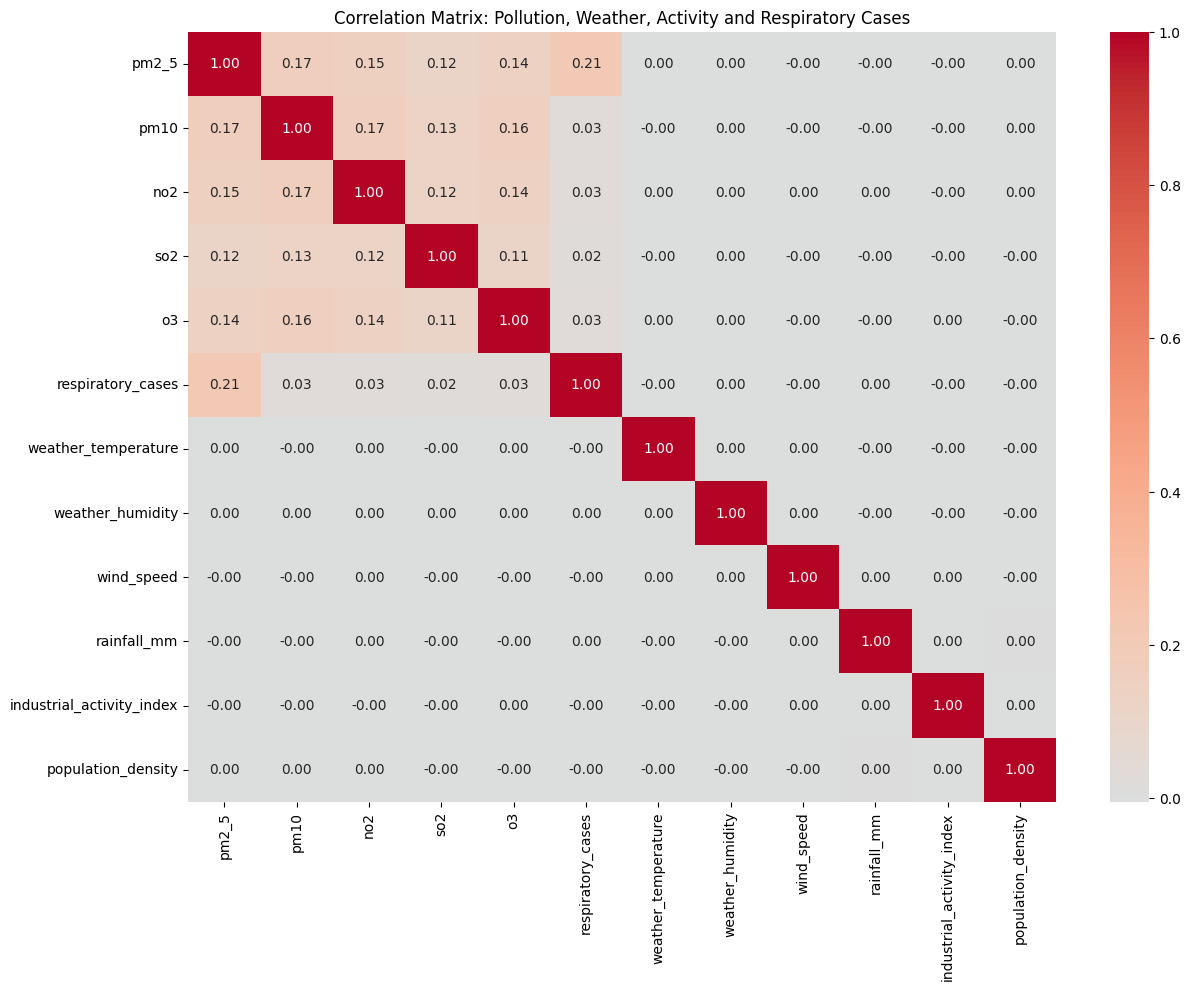

In [92]:
features_for_corr = pollutants + ['respiratory_cases', 'weather_temperature', 'weather_humidity',
                                  'wind_speed', 'rainfall_mm', 'industrial_activity_index', 'population_density']
features_for_corr = [f for f in features_for_corr if f in cleaned_data.columns]

plt.figure(figsize=(14,10))
corr_matrix = cleaned_data[features_for_corr].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Pollution, Weather, Activity and Respiratory Cases')
plt.show()

Season Column Values: season
Non-Harmattan    194700
Harmattan         63720
Name: count, dtype: int64
Humidity Std: 11.55060351168875
Temperature Std: 2.890275076653693
Harmattan Humidity vs. Pollution: Corr=0.001, p=0.744
Harmattan Temp vs. Pollution: Corr=-0.004, p=0.318


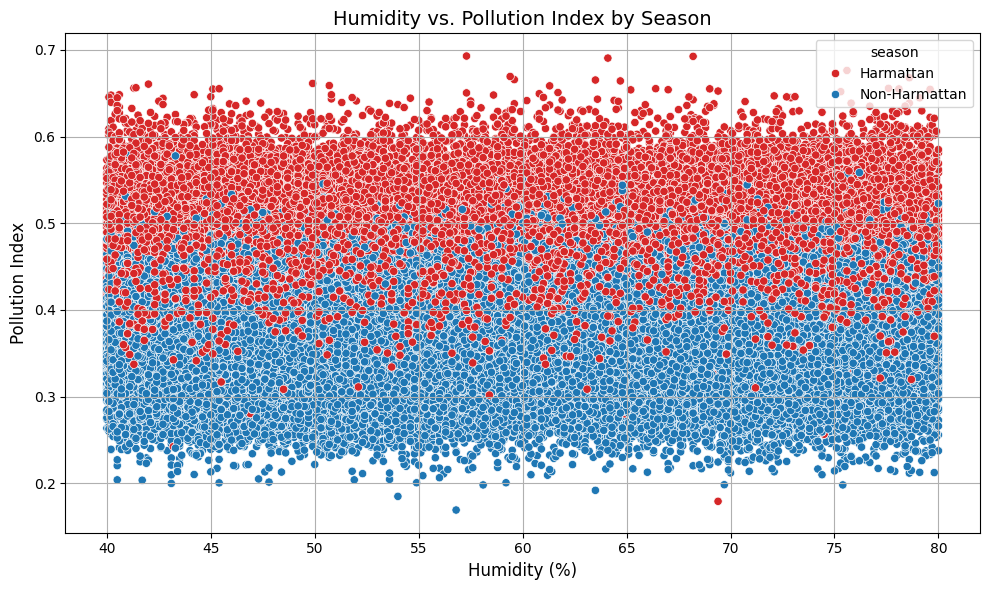

In [93]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure season column exists
cleaned_df['month'] = cleaned_df['date'].dt.month  # Ensure month column for reference
cleaned_df['season'] = cleaned_df['month'].apply(lambda m: 'Harmattan' if m in [12, 1, 2] else 'Non-Harmattan')

# Verify season column
print("Season Column Values:", cleaned_df['season'].value_counts())

# Check weather variability
print("Humidity Std:", cleaned_df['weather_humidity'].std())
print("Temperature Std:", cleaned_df['weather_temperature'].std())

# Stratified correlations (Harmattan only)
harmattan_df = cleaned_df[cleaned_df['month'].isin([12, 1, 2])]
corr_hum_poll_harm, p_hum_poll_harm = spearmanr(harmattan_df['weather_humidity'], harmattan_df['pollution_index'])
corr_temp_poll_harm, p_temp_poll_harm = spearmanr(harmattan_df['weather_temperature'], harmattan_df['pollution_index'])
print(f"Harmattan Humidity vs. Pollution: Corr={corr_hum_poll_harm:.3f}, p={p_hum_poll_harm:.3f}")
print(f"Harmattan Temp vs. Pollution: Corr={corr_temp_poll_harm:.3f}, p={p_temp_poll_harm:.3f}")

# Scatter plot: Humidity vs. Pollution, colored by season
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weather_humidity', y='pollution_index', hue='season', data=cleaned_df, palette={'Harmattan': '#d62728', 'Non-Harmattan': '#1f77b4'})
plt.title('Humidity vs. Pollution Index by Season', fontsize=14)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Pollution Index', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

**Harmattan Season** (Dec–Feb):

 Pollution index values range above 0.5 up to about 0.7, indicating elevated pollution levels. This reflects Harmattan's dry, dusty conditions, where low humidity (typically 40–60%) and Sahara winds spike PM2.5/PM10, worsening air quality.


**Non-Harmattan Season** (Mar–Nov):

 Pollution index is lower, between approximately 0.3 and 0.48, suggesting better air quality in wetter periods, where higher humidity and rainfall dilute pollutants.


**Overall Pattern:**

The plot shows distinct clustering, with Harmattan points at higher pollution, confirming seasonal group differences (e.g. higher Harmattan means from H3 t-tests) over continuous humidity correlations, highlighting Harmattan as a high-risk period for pollution spikes.

**Overall Interpretation:** The scatter plot visually supports EDA trends of Harmattan pollution rises, but the weak correlations indicate humidity/temperature act as modifiers within seasons rather than direct drivers. In Lagos, Harmattan's external dust dominates, explaining the discrepancy.

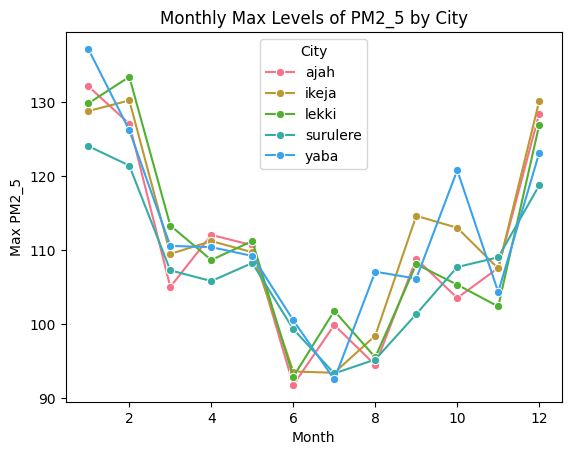

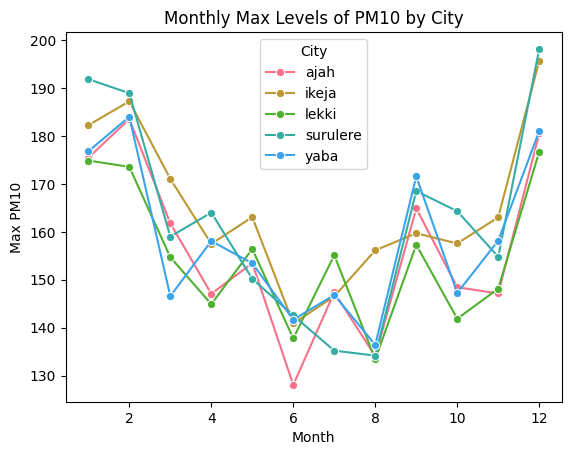

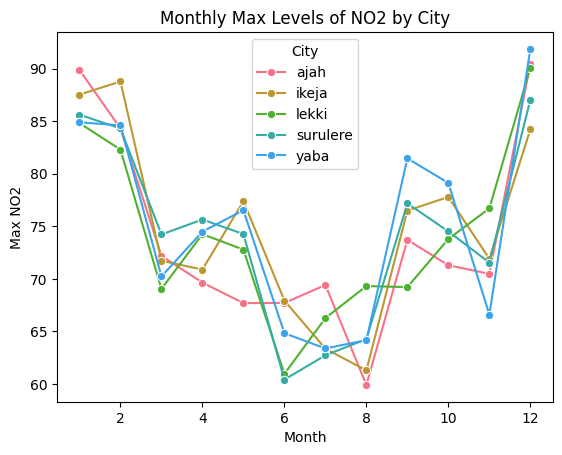

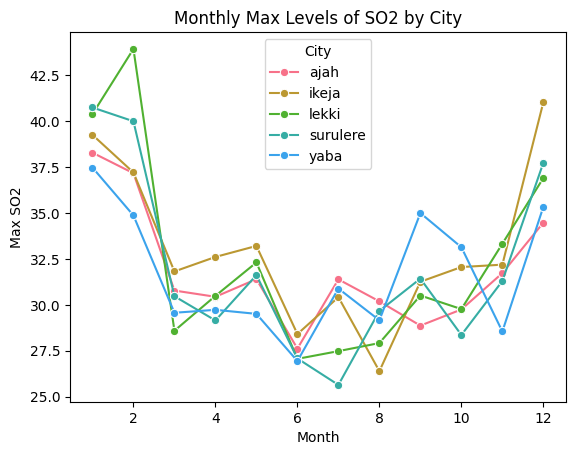

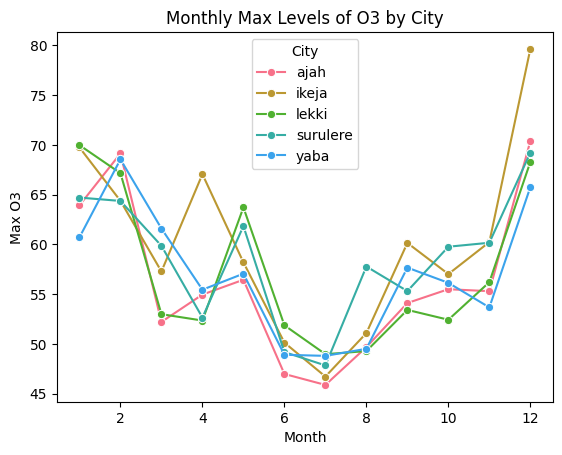

In [96]:
monthly_max_pollution = cleaned_df.groupby(['city', 'month'])[pollutants].max().reset_index()
for pollutant in pollutants:
  plt.figure()
  sns.lineplot(data=monthly_max_pollution, x='month', y=pollutant, hue='city', marker='o')
  plt.title(f'Monthly Max Levels of {pollutant.upper()} by City')
  plt.xlabel('Month')
  plt.ylabel(f'Max {pollutant.upper()}')
  plt.legend(title='City')
  plt.show()

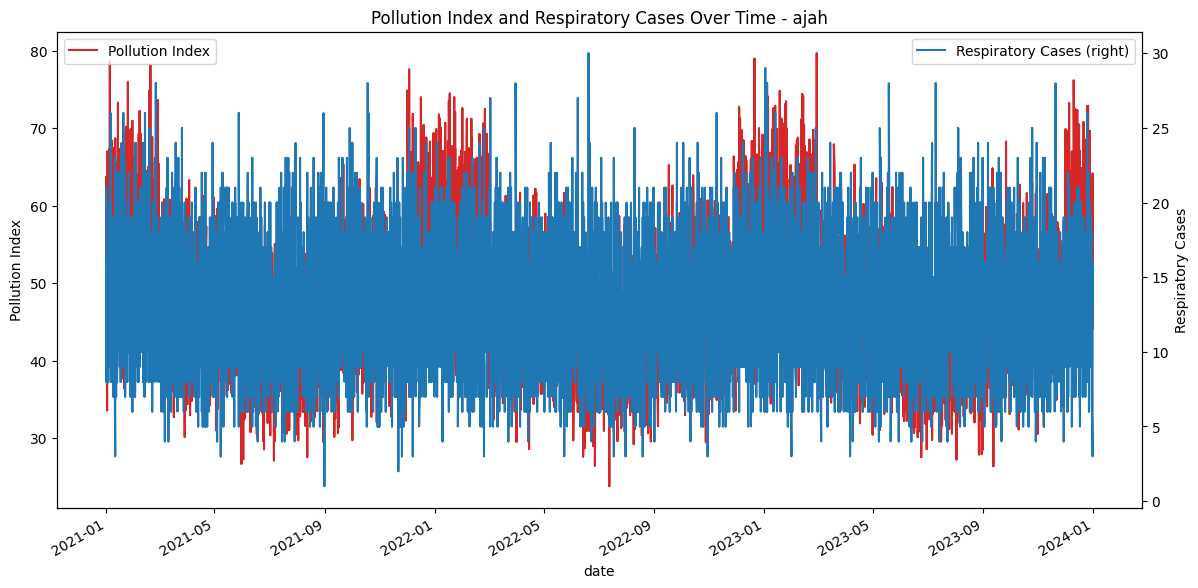

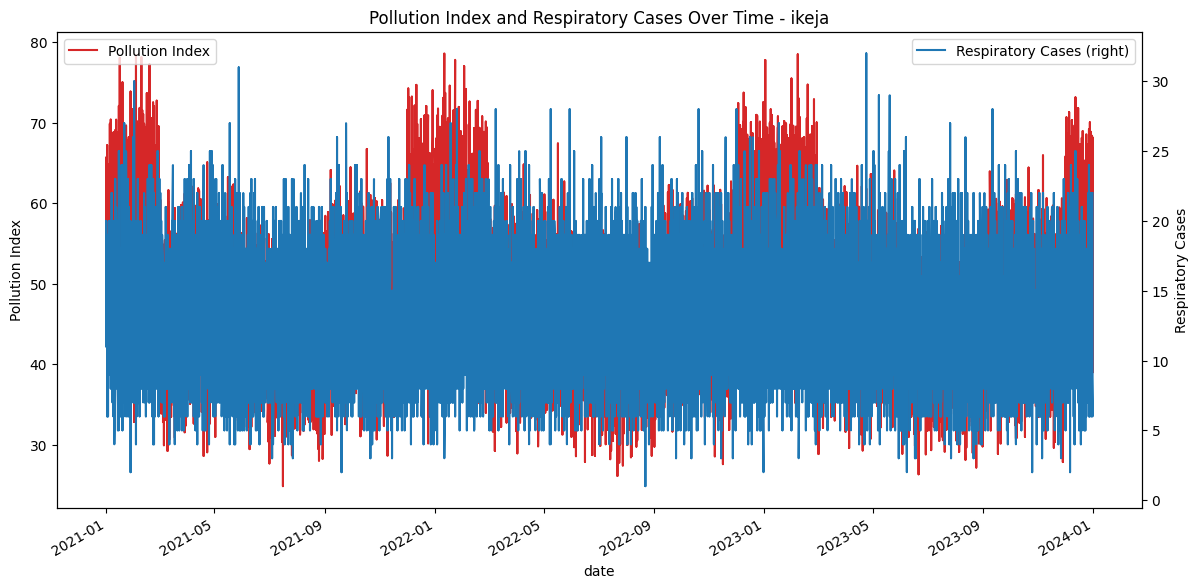

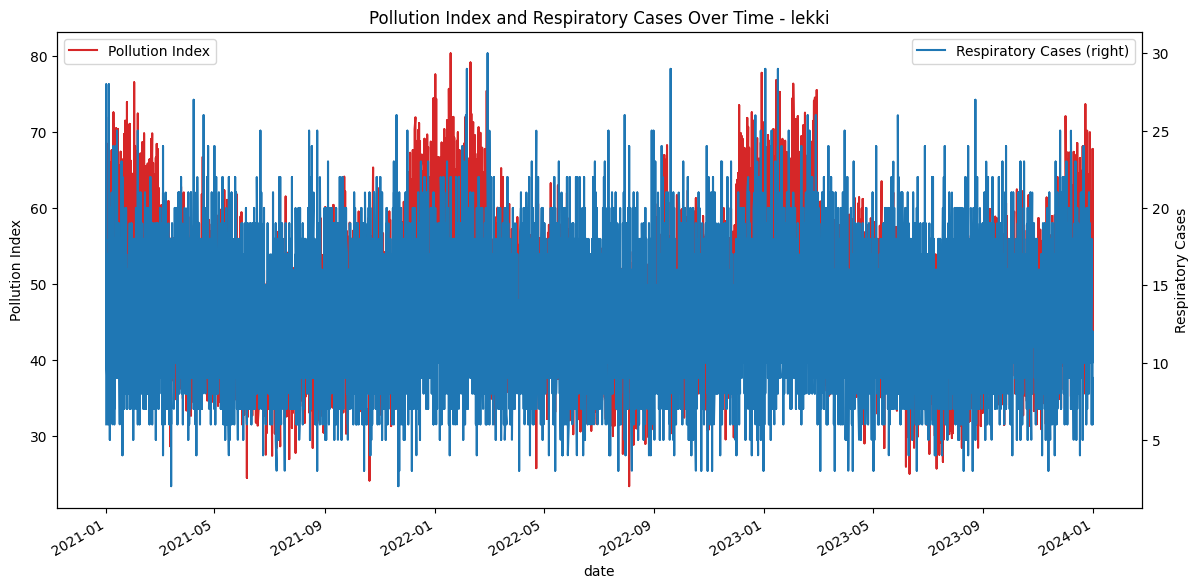

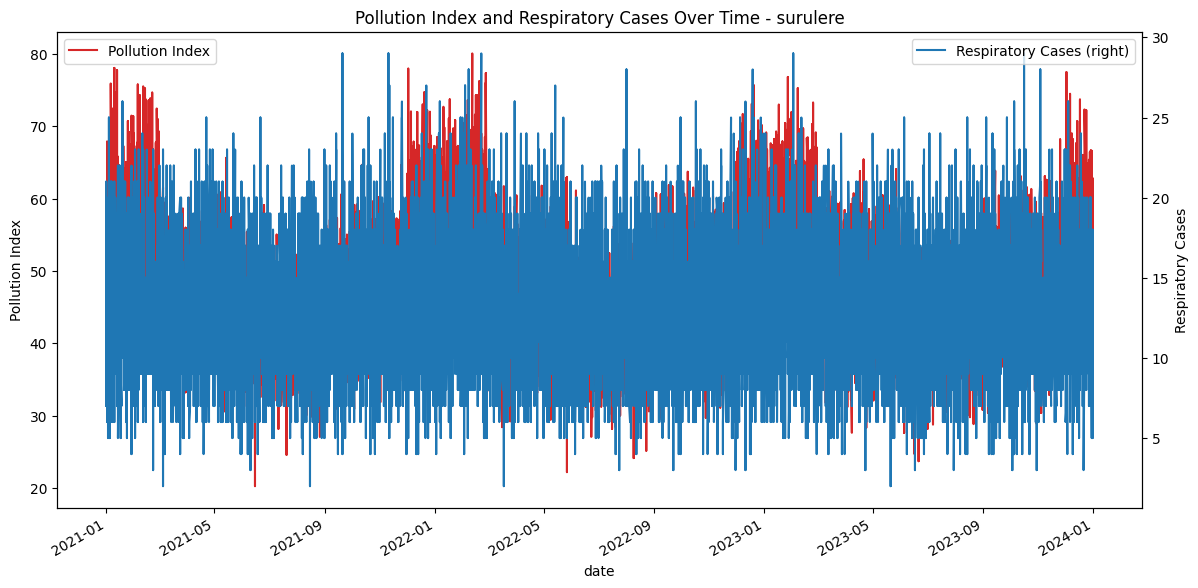

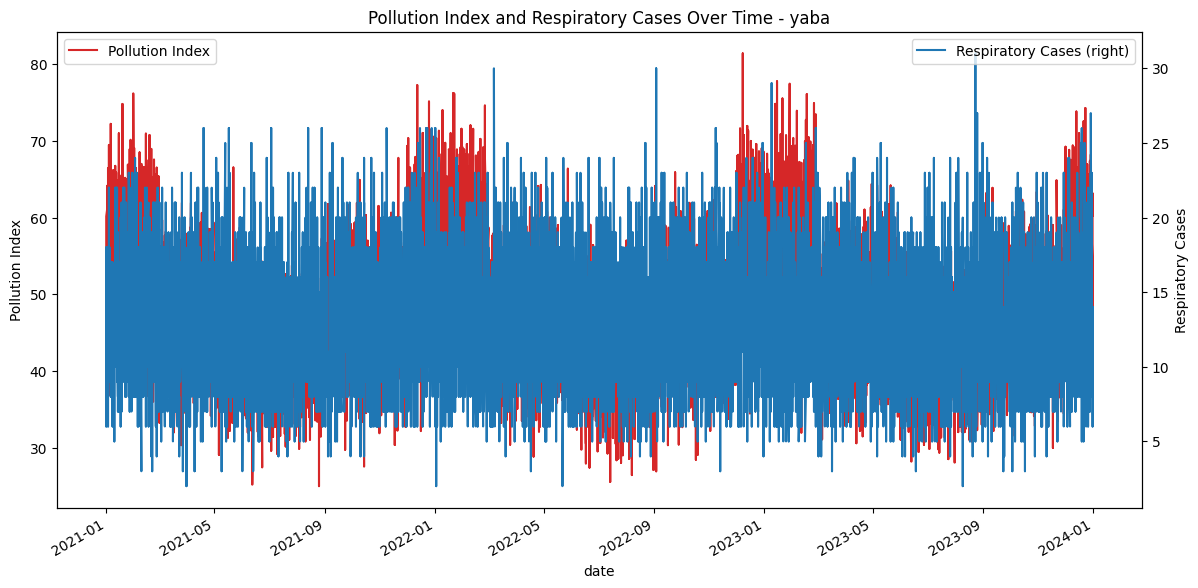

In [98]:
cities = cleaned_df['city'].unique()

for city in cities:
  city_data = cleaned_df[cleaned_df['city'] == city].set_index('date')

  plt.figure(figsize=(14, 7))
  ax1 = city_data['pollution_index_raw'].plot(label='Pollution Index', color='tab:red')
  ax2 = city_data['respiratory_cases'].plot(secondary_y=True, label='Respiratory Cases', color='tab:blue')

  ax1.set_ylabel('Pollution Index')
  ax2.set_ylabel('Respiratory Cases')
  plt.title(f'Pollution Index and Respiratory Cases Over Time - {city}')
  ax1.legend(loc='upper left')
  ax2.legend(loc='upper right')
  plt.show();

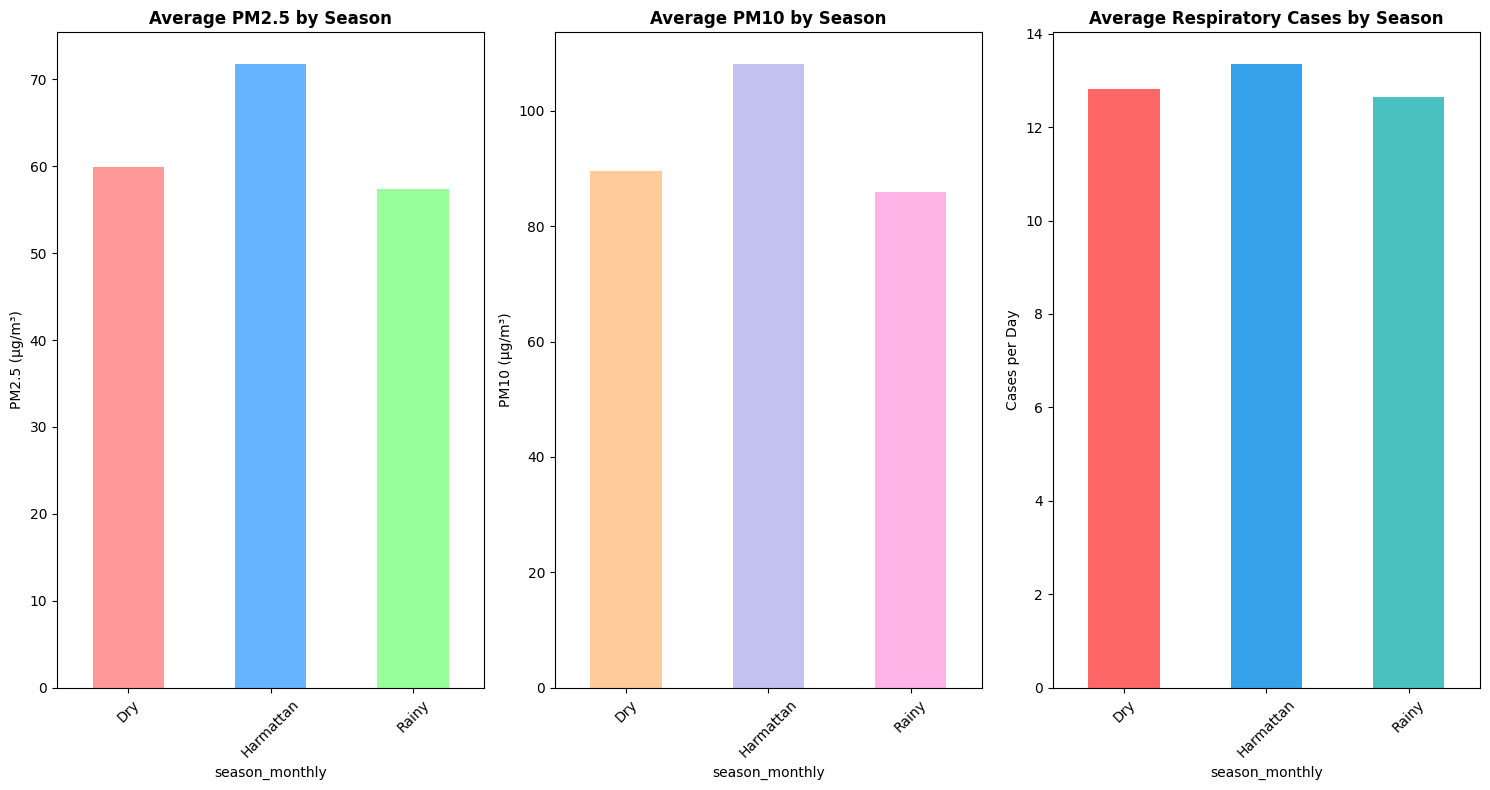

In [99]:
# Visualization of seasonal patterns
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
seasonal_pm25 = cleaned_df.groupby('season_monthly')['pm2_5'].mean()
seasonal_pm25.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Average PM2.5 by Season', fontweight='bold')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
seasonal_pm10 = cleaned_df.groupby('season_monthly')['pm10'].mean()
seasonal_pm10.plot(kind='bar', color=['#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.title('Average PM10 by Season', fontweight='bold')
plt.ylabel('PM10 (µg/m³)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
seasonal_cases = cleaned_df.groupby('season_monthly')['respiratory_cases'].mean()
seasonal_cases.plot(kind='bar', color=['#ff6666', '#36a2eb', '#4bc0c0'])
plt.title('Average Respiratory Cases by Season', fontweight='bold')
plt.ylabel('Cases per Day')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **MACHINE LEARNING**

**Preparing Data for Modeling**

Columns in cleaned_df: ['city', 'date', 'pm2_5', 'pm10', 'no2', 'so2', 'o3', 'hospital_id', 'respiratory_cases', 'avg_age_of_patients', 'weather_temperature', 'weather_humidity', 'wind_speed', 'rainfall_mm', 'population_density', 'industrial_activity_index', 'year', 'month', 'day_of_year', 'quarter', 'season_monthly', 'pollution_index_raw', 'pollution_index', 'year_month', 'season']

Rows before processing: 258420
Potential duplicates: 250517

Sample duplicates:
   city       date  hospital_id  pm2_5  respiratory_cases
0  ajah 2021-01-01  HOSP_AJA_10  39.86               14.0
1  ajah 2021-01-01   HOSP_AJA_6  68.06               16.0
2  ajah 2021-01-01  HOSP_AJA_10  77.60                9.0
4  ajah 2021-01-01   HOSP_AJA_3  85.23               17.0
5  ajah 2021-01-01   HOSP_AJA_6  76.38                9.0
Rows after dropping duplicates: 61241

city-day rows after aggregation: 61241


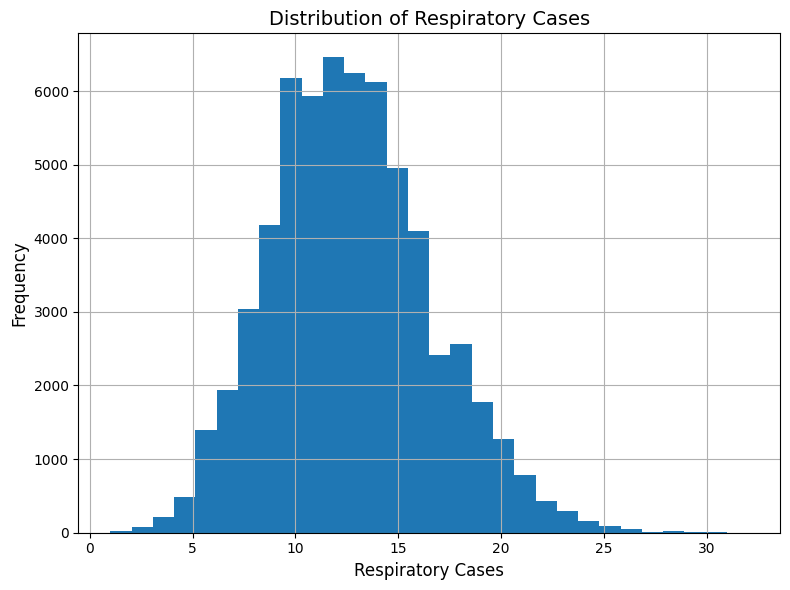


Variance Inflation Factor (VIF) for Numeric Features:
                      Feature        VIF
0                       pm2_5        inf
1                        pm10        inf
2                         no2        inf
3                         so2        inf
4                          o3        inf
5         weather_temperature   1.000274
6            weather_humidity   1.000312
7                  wind_speed   1.000362
8                 rainfall_mm   1.000282
9         pollution_index_raw        inf
10         population_density   1.000379
11  industrial_activity_index   1.000414
12                      month  17.708431
13                    quarter  17.727965

Training set shape: (48992, 16)
Test set shape: (12249, 16)
Feature names: ['pm2_5', 'pm10', 'no2', 'so2', 'o3', 'weather_temperature', 'weather_humidity', 'wind_speed', 'rainfall_mm', 'pollution_index_raw', 'population_density', 'industrial_activity_index', 'month', 'quarter', 'season_monthly_Harmattan', 'season_monthly_Rainy'

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Validate column names
print("Columns in cleaned_df:", cleaned_df.columns.tolist())

# Set key columns, using 'City'
city_col = 'City' if 'City' in cleaned_df.columns else 'city'
if city_col not in cleaned_df.columns:
    raise KeyError(f"City column not found. Available columns: {cleaned_df.columns.tolist()}")
key_cols = [city_col, 'date', 'hospital_id'] if 'hospital_id' in cleaned_df.columns else [city_col, 'date']

# Check duplicates
print("\nRows before processing:", len(cleaned_df))
duplicates = cleaned_df.duplicated(subset=key_cols, keep=False)
print("Potential duplicates:", duplicates.sum())
if duplicates.sum() > 0:
    print("\nSample duplicates:")
    print(cleaned_df[duplicates][key_cols + ['pm2_5', 'respiratory_cases']].head())
    cleaned_df = cleaned_df.drop_duplicates(subset=key_cols, keep='first')
    print("Rows after dropping duplicates:", len(cleaned_df))

# Add temporal and seasonal features
cleaned_df['year'] = cleaned_df['date'].dt.year
cleaned_df['month'] = cleaned_df['date'].dt.month
cleaned_df['day_of_year'] = cleaned_df['date'].dt.dayofyear
cleaned_df['quarter'] = cleaned_df['date'].dt.quarter

def season_from_month(month):
    if month in [12, 1, 2]:
        return 'Harmattan'
    elif month in [4, 5, 6, 7, 8, 9, 10]:
        return 'Rainy'
    else:
        return 'Dry'

cleaned_df['season_monthly'] = cleaned_df['month'].apply(season_from_month)

# Compute pollution_index_raw
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'o3']
if all(p in cleaned_df.columns for p in pollutants):
    cleaned_df['pollution_index_raw'] = cleaned_df[pollutants].mean(axis=1)

# Aggregate data (sum cases, mean others)
agg_cols_mean = pollutants + ['pollution_index_raw', 'weather_temperature', 'weather_humidity', 'wind_speed',
                             'population_density', 'industrial_activity_index']
agg_dict = {c: 'mean' for c in agg_cols_mean if c in cleaned_df.columns}
agg_dict.update({
    'respiratory_cases': 'sum',
    'rainfall_mm': 'sum',
    'year': 'first',
    'month': 'first',
    'day_of_year': 'first',
    'quarter': 'first',
    'season_monthly': 'first'
})

cleaned_df = cleaned_df.groupby(key_cols, as_index=False).agg(agg_dict)
cleaned_df = cleaned_df.sort_values(key_cols).reset_index(drop=True)

# Check post-aggregation size
print("\ncity-day rows after aggregation:", len(cleaned_df))

# Median imputation (manual)
numeric_cols = agg_cols_mean + ['respiratory_cases', 'rainfall_mm']
for col in numeric_cols:
    if col in cleaned_df.columns and cleaned_df[col].isna().sum() > 0:
        median_value = cleaned_df[col].median()
        cleaned_df[col] = cleaned_df[col].fillna(median_value)
        print(f"Imputed {col} with median: {median_value:.4f}")

# Check respiratory_cases distribution
plt.figure(figsize=(8, 6))
plt.hist(cleaned_df['respiratory_cases'], bins=30, color='#1f77b4')
plt.title('Distribution of Respiratory Cases', fontsize=14)
plt.xlabel('Respiratory Cases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Select features
features = ['pm2_5', 'pm10', 'no2', 'so2', 'o3', 'weather_temperature', 'weather_humidity',
            'wind_speed', 'rainfall_mm', 'pollution_index_raw', 'population_density',
            'industrial_activity_index', 'month', 'quarter', 'season_monthly']
target = 'respiratory_cases'

# Ensure no missing values
cleaned_df = cleaned_df.dropna(subset=features + [target])

# Manual preprocessing
numeric_features = ['pm2_5', 'pm10', 'no2', 'so2', 'o3', 'weather_temperature', 'weather_humidity',
                   'wind_speed', 'rainfall_mm', 'pollution_index_raw', 'population_density',
                   'industrial_activity_index', 'month', 'quarter']

categorical_features = ['season_monthly']

# Numeric scaling
scaler = StandardScaler()
X_numeric = cleaned_df[numeric_features]
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Categorical encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical = encoder.fit_transform(cleaned_df[categorical_features])

# Combine preprocessed data
X_preprocessed = np.hstack([X_numeric_scaled, X_categorical])

# Get feature names
cat_columns = encoder.get_feature_names_out(categorical_features)
feature_names = numeric_features + list(cat_columns)

# Split data
y = cleaned_df[target]
X_train_preprocessed, X_test_preprocessed, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Check VIF on training numeric part (first len(numeric_features) columns)
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_features
vif_data['VIF'] = [variance_inflation_factor(X_train_preprocessed[:, :len(numeric_features)], i) for i in range(len(numeric_features))]
print("\nVariance Inflation Factor (VIF) for Numeric Features:")
print(vif_data)

# Verify shapes
print("\nTraining set shape:", X_train_preprocessed.shape)
print("Test set shape:", X_test_preprocessed.shape)
print("Feature names:", feature_names)